In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
bc_df=pd.read_csv("data-breastCancer.csv")
bc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Assigning binary values to categorical variable column diagnosis which is the target variable**


In [ ]:
diag_dict = {'M': 1,'B': 0}

bc_df.diagnosis = [diag_dict[item] for item in bc_df.diagnosis]
bc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
bc_df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


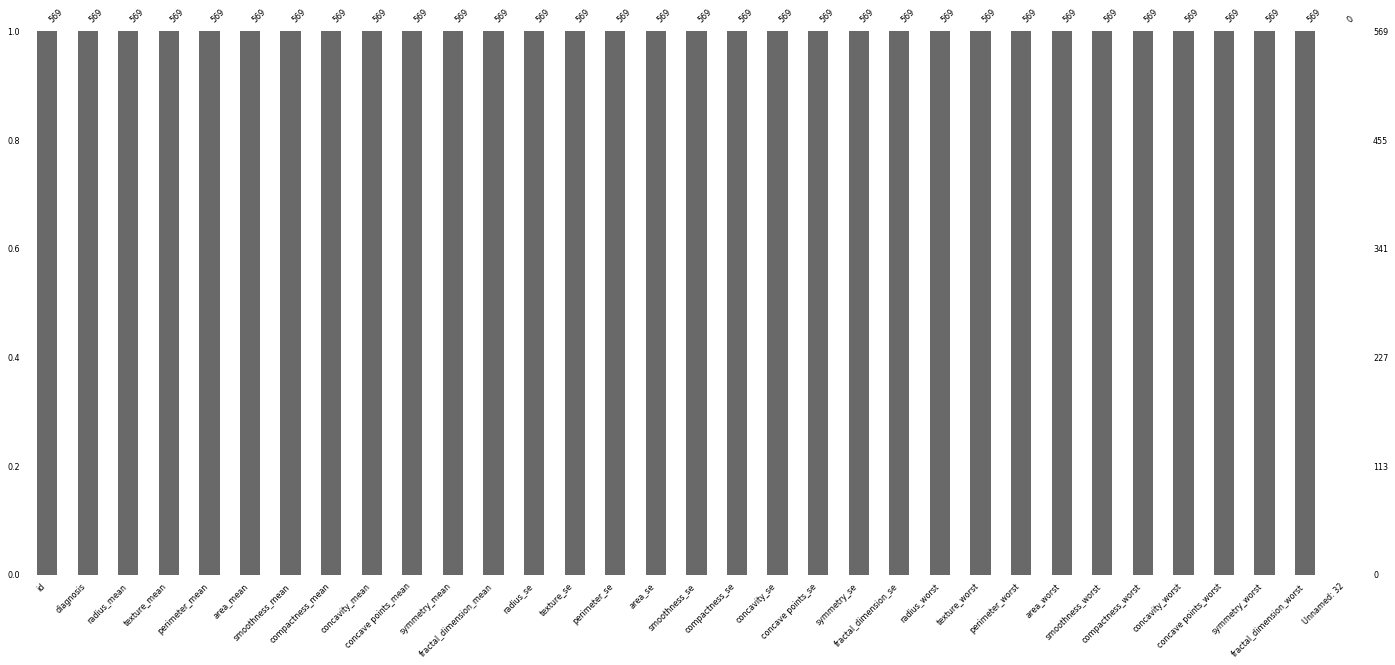

In [ ]:
#Visualizing null values using msno(MissingNO) function

import missingno as msno
msno.bar(bc_df,labels=True,fontsize=8)

**Deleting columns that are not required**


In [ ]:
bc_df = bc_df.drop(['Unnamed: 32','id'],axis=1)

In [ ]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
bc_df.shape

(569, 31)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


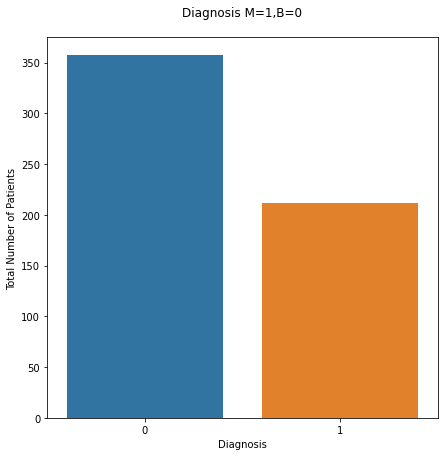

In [ ]:
plt.figure(figsize=(7,7))

ax = sns.countplot(bc_df.diagnosis)
ax.set(xlabel='Diagnosis', ylabel='Total Number of Patients')
ax.set_title("Diagnosis M=1,B=0\n")
plt.show()

In [ ]:
bc_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

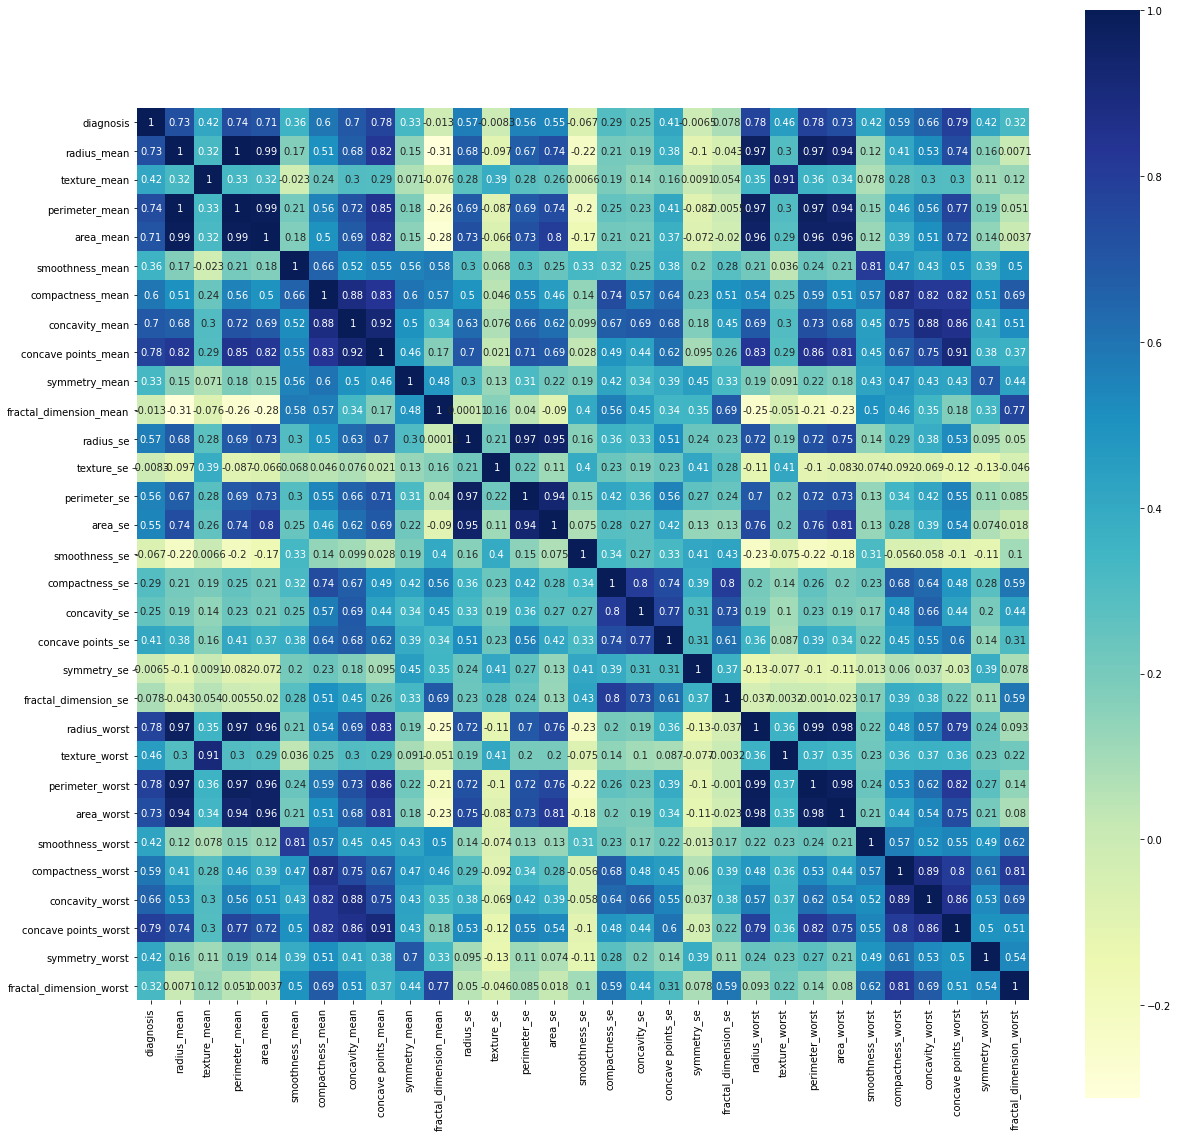

In [ ]:
plt.figure(figsize=(20,20))

sns.heatmap(bc_df.corr(), vmax=1, square=True,cmap="YlGnBu", annot=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdb80cb810>,
      dtype=object)

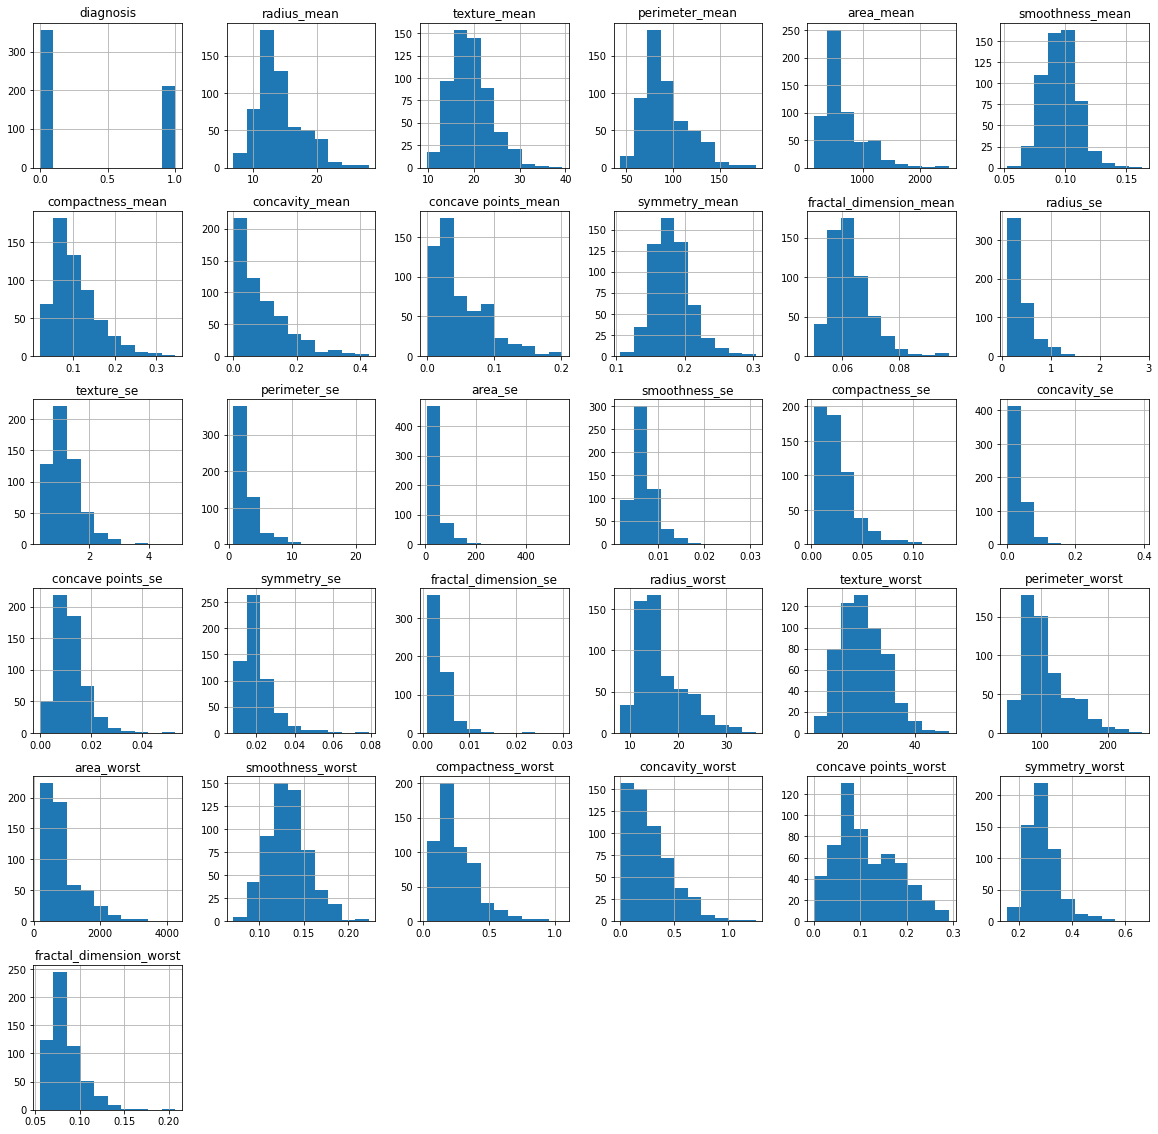

In [ ]:
bc_df.hist(figsize=(20,20))


In [ ]:
from sklearn.model_selection import train_test_split

predictors = bc_df.columns[1:30]
target_variable = bc_df.columns[0]

X = bc_df.loc[:,predictors]
y = bc_df.loc[:,target_variable]

# Split the dataset in train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ('Shape of training data set:',X_train.shape)
print ('Shape of testing data set:',X_test.shape)
print("\nFeatures that are considered:\n",predictors)

Shape of training data set: (455, 29)
Shape of testing data set: (114, 29)

Features that are considered:
 Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_for_class = RandomForestClassifier()
rand_for_class.fit(X_train,y_train)
y_pred = rand_for_class.predict(X_test)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
n=KFold(n_splits=10)
scores = cross_val_score(rand_for_class,X_train,y_train,cv=n)
for i in range(0, len(scores )):
  print("Cross validation for k={0}: {1: 0.3f}".format(i, scores[i]))
print ('\nAccuracy %s' % round((scores[i]*100),2))

Cross validation for k=0:  0.978
Cross validation for k=1:  0.957
Cross validation for k=2:  1.000
Cross validation for k=3:  0.935
Cross validation for k=4:  0.870
Cross validation for k=5:  0.978
Cross validation for k=6:  0.978
Cross validation for k=7:  0.933
Cross validation for k=8:  0.978
Cross validation for k=9:  0.956

Accuracy 95.56


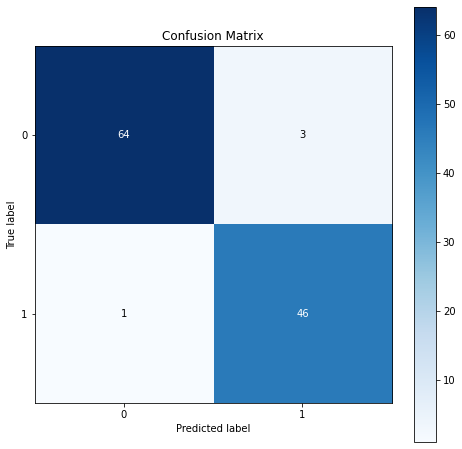

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
! pip install -q scikit-plot
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(8,8))

**The RandomForestClassifier() has an attribute that returns the feature importance of each feature.**



In [ ]:
importances=(rand_for_class.feature_importances_)
print("Breast Cancer Fetaure Importances:", importances)

Breast Cancer Fetaure Importances: [0.04153372 0.01641392 0.04947314 0.04310943 0.00604624 0.00705641
 0.07876872 0.13502028 0.00422045 0.00311848 0.01130134 0.00574661
 0.01377345 0.05531682 0.00395947 0.00485715 0.00930124 0.00330697
 0.00657454 0.00518536 0.09592144 0.02223922 0.08890817 0.10036934
 0.01239312 0.0197604  0.0378079  0.10294894 0.01556776]


In [ ]:
for i in range (0,len(predictors)):
  print("Feature {0} has a Mean Decrease in Impurity of {1:.5f}".format(predictors[i],importances[i]))


Feature radius_mean has a Mean Decrease in Impurity of 0.04153
Feature texture_mean has a Mean Decrease in Impurity of 0.01641
Feature perimeter_mean has a Mean Decrease in Impurity of 0.04947
Feature area_mean has a Mean Decrease in Impurity of 0.04311
Feature smoothness_mean has a Mean Decrease in Impurity of 0.00605
Feature compactness_mean has a Mean Decrease in Impurity of 0.00706
Feature concavity_mean has a Mean Decrease in Impurity of 0.07877
Feature concave points_mean has a Mean Decrease in Impurity of 0.13502
Feature symmetry_mean has a Mean Decrease in Impurity of 0.00422
Feature fractal_dimension_mean has a Mean Decrease in Impurity of 0.00312
Feature radius_se has a Mean Decrease in Impurity of 0.01130
Feature texture_se has a Mean Decrease in Impurity of 0.00575
Feature perimeter_se has a Mean Decrease in Impurity of 0.01377
Feature area_se has a Mean Decrease in Impurity of 0.05532
Feature smoothness_se has a Mean Decrease in Impurity of 0.00396
Feature compactness_se h

In [ ]:
predictors

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

Text(0, 0.5, 'Feature')

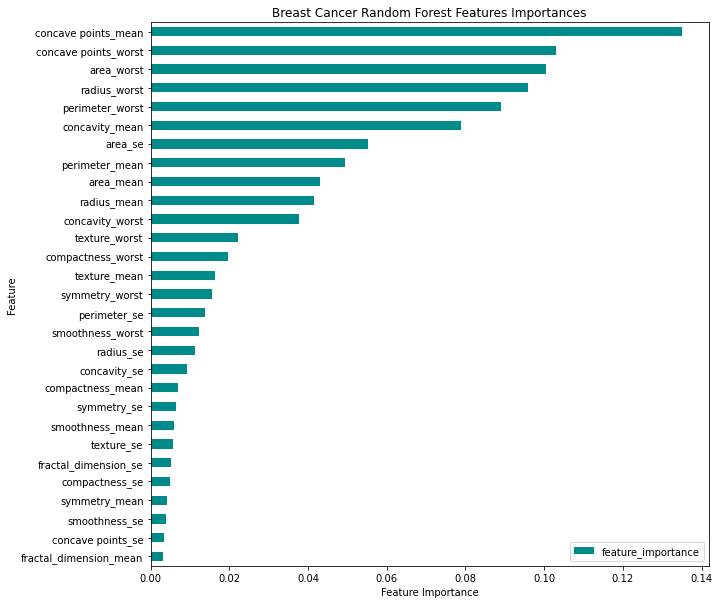

In [ ]:
df=pd.DataFrame({'features':predictors,'feature_importance':importances})
df.sort_values('feature_importance',inplace=True)
df.plot(kind='barh',y='feature_importance',x='features',color=['#008B8B'],figsize=(10,10))
plt.title('Breast Cancer Random Forest Features Importances')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")


***ROC Curve***


In [ ]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

prob_vector = rand_for_class.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_vector, pos_label=1)

Area under Curve: 0.9961892664337885


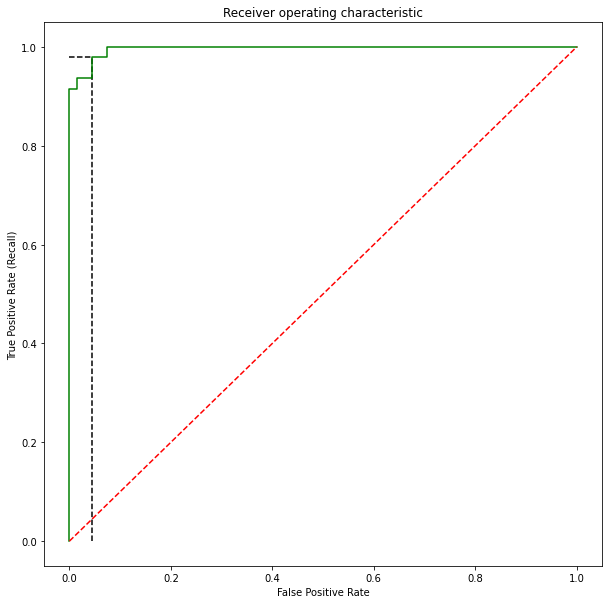

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

roc_auc = metrics.auc(fpr, tpr)    
recall = metrics.recall_score(y_test, y_pred)

ax.plot(fpr, tpr, color='green')
ax.plot([0,1], [0,1], color='red', linestyle='dashed')
ax.hlines(y=recall, xmin=0, xmax=1-cm[0,0]/(cm[0,0]+cm[0,1]), color='black', linestyle='dashed')
ax.vlines(x=1-cm[0,0]/(cm[0,0]+cm[0,1]), ymin=0, ymax=recall, color='black', linestyle='dashed')
ax.set(xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")     
print("Area under Curve:", roc_auc)